# Getting Started with GRASS GIS

_**Caitlin Haedrich and Pratikshya Regmi**, North Carolina State University_

https://link.springer.com/book/10.1007/978-1-4939-1835-5

In this notebook we will:
* Set up a GRASS GIS Project and import our data
* Get a quick overview of working with GRASS Tools and the Python API

## 1. Import Python Packages

Import Python standard library and IPython packages we need.

In [19]:
import subprocess
import sys
from pathlib import Path

We're going to import the GRASS GIS python API (`grass.script`) and the GRASS GIS Jupyter package (`grass.jupyter`). But first, we need to find the path to those packages using the `--config python_path` command. This command is slightly different for each operating system.

We use `subprocess.check_output` to find the path and `sys.path.append` to add it to the path.

In [2]:
sys.path.append(
    subprocess.check_output(["grass", "--config", "python_path"], text=True, shell=False).strip()
)

And now we can import the GRASS python packages!

In [3]:
# Import the GRASS GIS packages we need.
import grass.script as gs
import grass.jupyter as gj

## 2. Create a New Project

In [4]:
proj_string = "+proj=lcc +lat_1=36.16666666666666 +lat_2=34.33333333333334 +lat_0=33.75 +lon_0=-79 +x_0=609601.22 +y_0=0 +no_defs +a=6378137 +rf=298.257222101 +towgs84=0.000,0.000,0.000 +type=crs  +to_meter=1"

In [5]:
gs.create_project("nags_head", proj4 = proj_string, overwrite=True) # Warning! Overwrite=True will delete any all existing data in the project! Use carefully...

## 3. Start GRASS Session

In [6]:
gj.init("./nags_head/PERMANENT");

We've launched GRASS GIS now! We can access GRASS GIS commands using the command line interface (with the `!` line magic):

In [7]:
!g.version

GRASS 8.4.0dev (2024)


In [8]:
!g.region -p

projection: 99 (unknown)
zone:       0
datum:      towgs84=0,0,0,0,0,0,0
ellipsoid:  grs80
north:      1
south:      0
west:       0
east:       1
nsres:      1
ewres:      1
rows:       1
cols:       1
cells:      1


## 4. Import Data

In [13]:
!r.import input=".data/naip_2020.tif" output="naip_2020"

Importing raster map <naip_2020>...
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100
Estimated target resolution for input band <naip_2020>: 1.0
Reprojecting <naip_2020>...


In [16]:
!g.region raster="naip_2020" -p

projection: 99 (unknown)
zone:       0
datum:      towgs84=0,0,0,0,0,0,0
ellipsoid:  grs80
north:      251000
south:      249350
west:       912100
east:       914500
nsres:      1
ewres:      1
rows:       1650
cols:       2400
cells:      3960000


## 4. GRASS GIS tools

GRASS functionality is available through tools (also called modules). There are over 500 different tools in the core distribution and over 300 addon tools that can be used to prepare and analyze data.

Tools respect the following naming conventions:

Prefix | Function | Example
------ | -------- | -------
r.* | raster processing | r.mapcalc: map algebra
v.*	| vector processing	| v.clean: topological cleaning
i.*	| imagery processing | i.segment: object recognition
db.* | database management | db.select: select values from table
r3.* | 3D raster processing | r3.stats: 3D raster statistics
t.* | temporal data processing | t.rast.aggregate: temporal aggregation
g.* | general data management | g.rename: renames map
d.* | display | d.rast: display raster map

Note also that some tools have multiple dots in their names. For example, tools staring with v.net.* deal with vector network analysis and r.in.* tools import raster data into GRASS GIS spatial database.

There is a tool for finding other tools:

In [ ]:
!g.search.modules keyword=zonal

Here is how to get all options and flags of a GRASS tool:

In [ ]:
!r.univar --help

This will open the tool's manual page. It will work only locally.

```
g.manual r.univar
```

## 5. GRASS Python API

There are two Python APIs for accessing a tool's functionality - [GRASS GIS Python Scripting Library](https://grass.osgeo.org/grass-stable/manuals/libpython/script_intro.html) and [PyGRASS](https://grass.osgeo.org/grass-stable/manuals/libpython/pygrass_index.html).
PyGRASS is advantageous for more advanced workflows. Here we will be using Python Scripting Library (`import grass.script as gs`)
as it is simple and straightforward to use.
 

GRASS GIS Python Scripting Library provides functions to call GRASS modules within scripts as subprocesses. The most often used functions include:

 * [run_command()](https://grass.osgeo.org/grass-stable/manuals/libpython/script.html#script.core.run_command): used with modules which output raster/vector data where text output is not expected
 * [read_command()](https://grass.osgeo.org/grass-stable/manuals/libpython/script.html#script.core.read_command): used when we are interested in text output
 * [parse_command()](https://grass.osgeo.org/grass-stable/manuals/libpython/script.html#script.core.parse_command): used with modules producing text output as key=value pair
 * [write_command()](https://grass.osgeo.org/grass-stable/manuals/libpython/script.html#script.core.write_command): for modules expecting text input from either standard input or file

Here's an example of the Python API in action:

In [ ]:
!gs.read_command("g.list", type="raster")

Try it for yourself! The `r.info map=NAME` command will print information about the raster NAME. Execute `r.info` in Python.

The Python API also provides several wrapper functions for often called modules. The list of convenient wrapper functions with examples includes:

 * Raster metadata using [raster_info()](https://grass.osgeo.org/grass-stable/manuals/libpython/script.html#script.raster.raster_info): `gs.raster_info('dsm')`
 * Vector metadata using [vector_info()](https://grass.osgeo.org/grass-stable/manuals/libpython/script.html#script.vector.vector_info): `gs.vector_info('roads')`
 * List raster data in current location using [list_grouped()](https://grass.osgeo.org/grass-stable/manuals/libpython/script.html#script.core.list_grouped): `gs.list_grouped(type=['raster'])`
 * Get current computational region using [region()](https://grass.osgeo.org/grass-stable/manuals/libpython/script.html#script.core.region): `gs.region()`
 * Run raster algebra using [mapcalc()](https://grass.osgeo.org/grass-stable/manuals/libpython/script.html#script.raster.mapcalc): `gs.mapcalc()`

Try using `gs.raster_info` to print information about NAME.

Now for a more sophisticated example. Let's import all the NAIP images using a Python for loop.

In [30]:
files = sorted(Path('./data/').glob('*.tif'))

for file in files:
    name = str(file)[5:-4]
    print("importing " + name)
    gs.run_command("r.import", input=file, output=name)

importing naip_2014
importing naip_2016
importing naip_2018
importing naip_2020


### Data Visualization with `grass.jupyter`

`grass.jupyter.Map()` creates and displays GRASS maps as PNG images. `gj.Map()` accepts any GRASS display module as a method by replacing the "." with "\_" in the module name. For example:

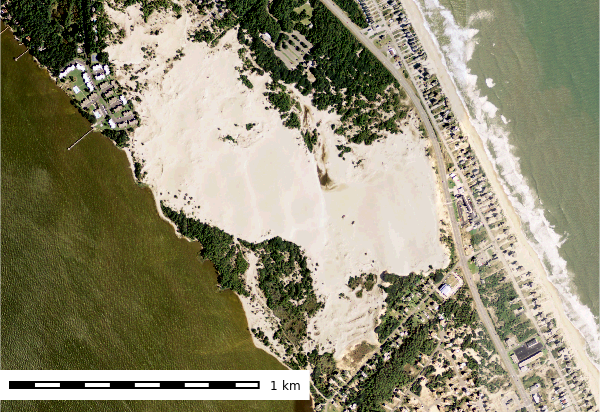

In [18]:
example = gj.Map()
example.d_rast(map="naip_2020") # d.rast map=naip_2020
example.d_barscale() # d.barscale
example.show()

To display the image, call `show()`. You can also save the image with the `save()` method.